# Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
train = pd.read_csv('I:Titanic_train.csv')

In [29]:
test = pd.read_csv('I:Titanic_test.csv')

In [30]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.shape

(891, 12)

In [32]:
test.shape

(418, 11)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Exploratory Data Analysis

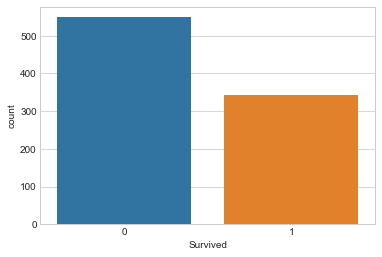

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

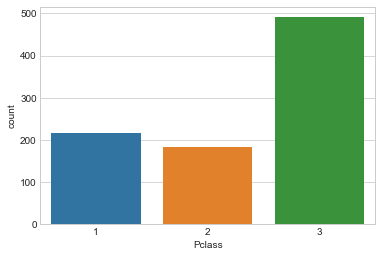

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=train)

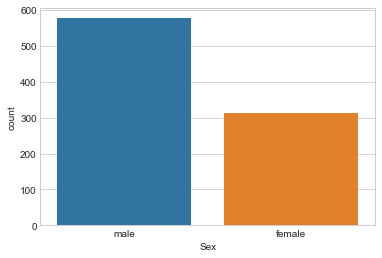

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=train)

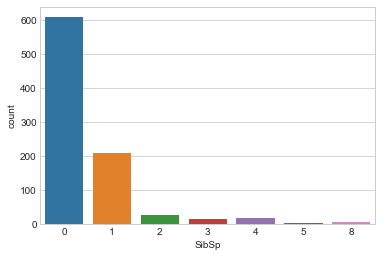

In [38]:
sns.countplot(x='SibSp',data=train)

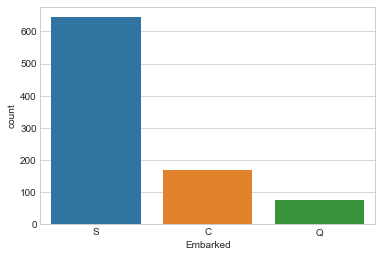

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=train)

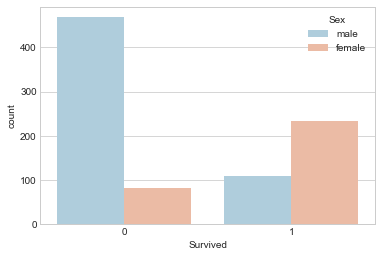

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

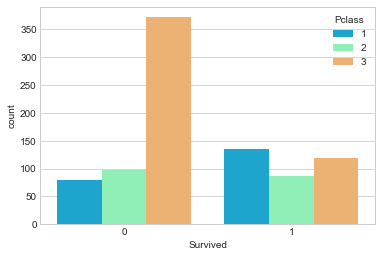

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

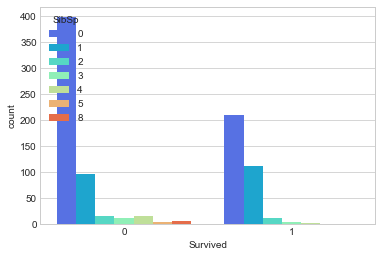

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train,palette='rainbow')

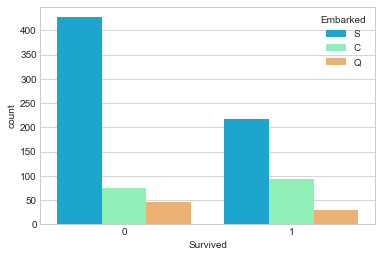

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

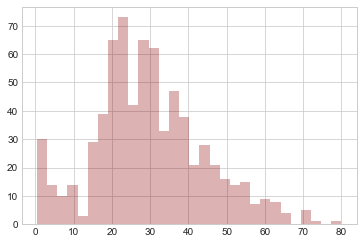

In [44]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

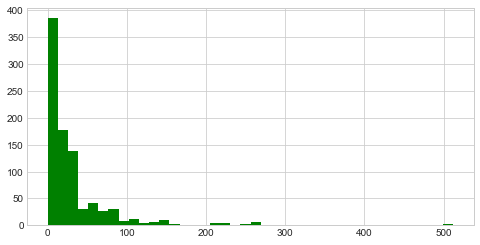

In [45]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Missing Data

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows.

Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values.

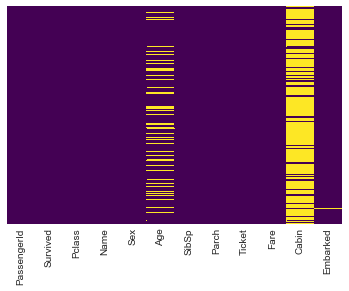

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

___
## Data Cleaning
We required to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


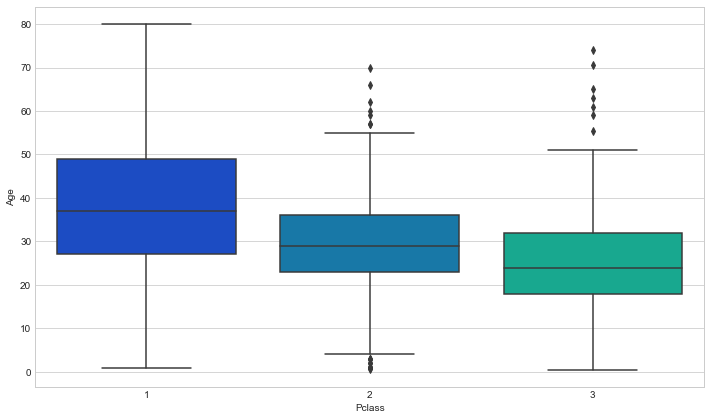

In [48]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [50]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

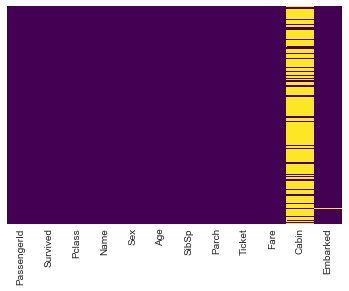

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
train.drop('Cabin',axis=1,inplace=True)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


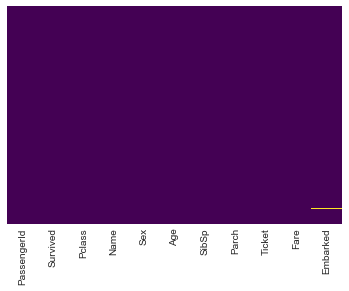

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
#train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [58]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [59]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [60]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [61]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [63]:
train = pd.concat([train,sex,embark],axis=1)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Train Test Split

In [65]:
x=train.drop('Survived',axis=1)
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [66]:
y=train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=101)
                                                

## Training and Predicting

# Logistic Regression model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predictions = logmodel.predict(X_test)

## Evaluation For Logistic regression

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [73]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7761194029850746

In [74]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



In [75]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



# K Nearest Neighbors

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [78]:
predictions1 = KNN.predict(X_test)

# Evaluation For KNN

In [79]:
accuracy1=accuracy_score(y_test,predictions1)
accuracy1

0.6268656716417911

In [80]:
print(classification_report(y_test,predictions1))

             precision    recall  f1-score   support

          0       0.63      0.87      0.73       154
          1       0.63      0.30      0.40       114

avg / total       0.63      0.63      0.59       268



# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
predictions2 = clf.predict(X_test)

# Evaluation For Decision Tree

In [84]:
accuracy2=accuracy_score(y_test,predictions2)
accuracy2

0.7574626865671642

In [85]:
print(classification_report(y_test,predictions2))

             precision    recall  f1-score   support

          0       0.76      0.84      0.80       154
          1       0.75      0.64      0.69       114

avg / total       0.76      0.76      0.75       268



# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Dell\Anaconda3\ANA\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [87]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
predictions3 = RF.predict(X_test)

# Evaluation For Random forest

In [89]:
accuracy3=accuracy_score(y_test,predictions3)
accuracy3

0.8022388059701493

In [90]:
print(classification_report(y_test,predictions3))

             precision    recall  f1-score   support

          0       0.78      0.91      0.84       154
          1       0.84      0.66      0.74       114

avg / total       0.81      0.80      0.80       268

